# Comparing Equally Weighted and Cap Weighted Portfolios
Load the EW and CW versions of the returns of the industry portfolios.

In [3]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind_cw = erk.get_ind_returns(weighting='vw')
ind_ew = erk.get_ind_returns(weighting='ew')

In [5]:
sr = pd.DataFrame({
    'CW': erk.sharpe_ratio(ind_cw['1945':], 0.03, 12),
    'EW': erk.sharpe_ratio(ind_ew['1945':], 0.03, 12)
})

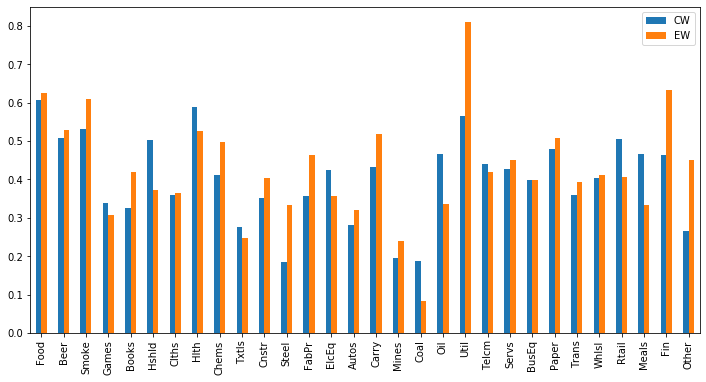

In [6]:
sr.plot.bar(figsize=(12, 6))

In [8]:
(sr['EW'] > sr['CW']).sum()*100/sr.shape[0]

63.333333333333336

Text(0.5, 1.0, 'Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018')

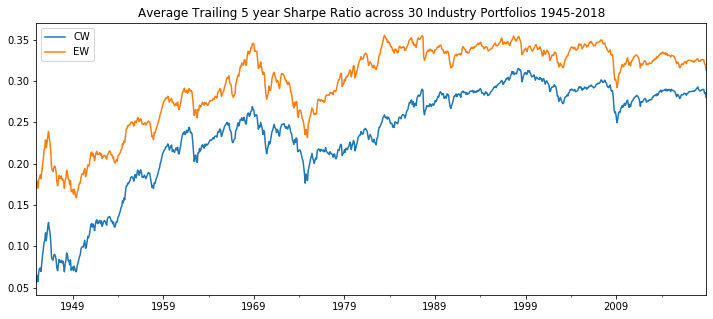

In [12]:
ax = ind_cw.rolling('1825D').apply(erk.sharpe_ratio, raw=True, kwargs={
    'riskfree_rate': 0.03,
    'periods_per_year': 12
}).mean(axis=1)['1945':].plot(figsize=(12, 5), label='CW', legend=True)
ind_ew.rolling('1825D').apply(erk.sharpe_ratio, raw=True, kwargs={
    'riskfree_rate': 0.03,
    'periods_per_year': 12
}).mean(axis=1)['1945':].plot(ax=ax, label='EW', legend=True)
ax.set_title('Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018')